In [1]:
import pandas as pd
import numpy as np
import csv
import math
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [2]:
def mse(pre, act):
    er = 0
    for i in range(len(pre)):
        er +=(pre[i][0]-act[i])**2
    er = er/len(pre)
    er = er**(1/2)
    er = er/(sum(act)/len(act))
    return (1-er)*100

In [16]:
def add_data(filename, data):
    to_add = []
    with open(filename, mode='r')as csvfile:
        csvFile = csv.reader(csvfile)
        for lines in csvFile:
            to_add.append(lines)

    # data rows of csv file
    rows = [data]

    for i in rows:
        to_add.append(i)

    # writing to csv file
    with open(filename, 'w') as csvfile:
        # creating a csv writer object
        csvwriter = csv.writer(csvfile)

        # writing the data rows
        for j in to_add:
            if (j == []):
                continue
            else:
                csvwriter.writerow(j)


In [4]:
data = pd.read_csv("data_age.csv")
data = data.sample(frac=1)

In [5]:
#Set Target Variable
output_var = pd.DataFrame(data['Retirement'])
#Selecting the Features
features = [
	"Debut Age (yrs)","No of innings",	"cummulative runs", "number of fiftees"]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()
# feature_transform

,Debut Age (yrs),No of innings,cummulative runs,number of fiftees
0,0.201526,0.426752,0.509899,0.656863
1,0.786580,0.254777,0.248144,0.411765
2,0.230027,0.745223,0.809728,0.872549
3,0.413824,0.662420,0.750048,0.872549
4,0.117819,0.369427,0.100324,0.049020


In [7]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=5)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [9]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(5))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']
             )


In [10]:
history=lstm.fit(X_train, y_train, epochs=750, batch_size=8, verbose=0, shuffle=False)

In [11]:
y_pred= lstm.predict(X_test)
print(lstm.summary())


1/1 [==============================] - 0s 212ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 4,907
Trainable params: 4,907
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\deeps\AppData\Local\Temp\ipykernel_12028\520089183.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  er = er/(sum(act)/len(act))


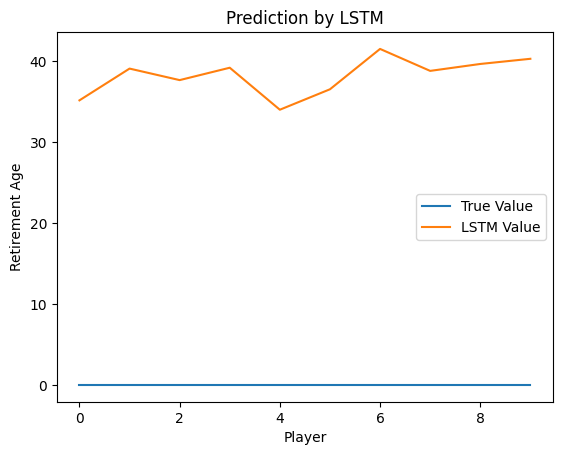

[[35.163883]
 [39.088036]
 [37.66438 ]
 [39.19405 ]
 [34.00548 ]
 [36.530724]
 [41.517918]
 [38.804276]
 [39.65931 ]
 [40.297943]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Player')
plt.ylabel('Retirement Age')
plt.legend()
plt.show()

In [17]:
mean_sqaure_error = mse(y_pred, y_test)
print(mean_sqaure_error)
# add = []
# for i in y_pred:
#     add.append(i[0])
# add_data("predicted_age.csv",add)

-inf
